In [ ]:
import numpy as np 
import pandas as pd
from sklearn.metrics import f1_score , accuracy_score , precision_score , recall_score 
import time

In [142]:
def read_data(trainfile='MNIST_train.csv', validationfile='MNIST_validation.csv'):
    
    dftrain = pd.read_csv(trainfile)
    dfval = pd.read_csv(validationfile)

    featurecols = list(dftrain.columns)
    featurecols.remove('label')
    featurecols.remove('even')
    targetcol = 'label'

    Xtrain = dftrain[featurecols]
    ytrain = dftrain[targetcol]
    
    Xval = dfval[featurecols]
    yval = dfval[targetcol]

    return (Xtrain, ytrain, Xval, yval)

In [143]:
def linear_regression_ovr(X_train, y_train, X_val, lr = 0.01,epochs = 20 ,batch_size = 128,lambda_l2 = 0.001):

    X_train = X_train /255.0 
    X_val = X_val /255.0 

    X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
    X_val  = np.hstack([np.ones((X_val.shape[0], 1)), X_val])

    num_classes = 10
    num_features = X_train.shape[1]

    np.random.seed(46)
    W = np.random.randn(num_classes, num_features) * 0.01 

    for epoch in range(epochs):

        indices = np.random.permutation(len(X_train))

        for start in range(0, len(X_train), batch_size):
            end = start + batch_size
            batch_idx = indices[start:end]

            Xb = X_train[batch_idx]
            yb = y_train[batch_idx]

            scores = Xb @ W.T   

            Y_onehot = np.zeros((len(yb), num_classes))
            Y_onehot[np.arange(len(yb)), yb] = 1

            grad = 2 * (scores - Y_onehot).T @ Xb / len(Xb)  
            grad += 2 * lambda_l2 * np.hstack([np.zeros((num_classes,1)), W[:,1:]])
            W -= lr * grad

    scores_test = X_val @ W.T
    y_pred = np.argmax(scores_test, axis=1)

    return  y_pred

In [144]:
X_train, y_train, X_val, y_val = read_data()

In [145]:
y_pred = linear_regression_ovr(X_train, y_train, X_val, lr = 0.01,epochs = 40 ,batch_size = 56,lambda_l2 = 0.01)

In [146]:
print("F1 Score: ", f1_score(y_val, y_pred, average='macro'))
print("Accuracy: ", accuracy_score(y_val, y_pred))  
print("Precision: ", precision_score(y_val, y_pred, average='macro'))
print("Recall: ", recall_score(y_val, y_pred, average='macro'))

F1 Score:  0.853337018559533
Accuracy:  0.8551420568227291
Precision:  0.8564000941744393
Recall:  0.8530209412168593


In [147]:
y_pred = linear_regression_ovr(X_train, y_train, X_val, lr = 0.03,epochs = 30 ,batch_size = 112,lambda_l2 = 0.01)

C:\Users\pnvna\AppData\Local\Temp\ipykernel_28152\3075036337.py:31: RuntimeWarning: overflow encountered in matmul
  grad = 2 * (scores - Y_onehot).T @ Xb / len(Xb)
C:\Users\pnvna\AppData\Local\Temp\ipykernel_28152\3075036337.py:31: RuntimeWarning: overflow encountered in matmul
  grad = 2 * (scores - Y_onehot).T @ Xb / len(Xb)
C:\Users\pnvna\AppData\Local\Temp\ipykernel_28152\3075036337.py:31: RuntimeWarning: invalid value encountered in matmul
  grad = 2 * (scores - Y_onehot).T @ Xb / len(Xb)
C:\Users\pnvna\AppData\Local\Temp\ipykernel_28152\3075036337.py:33: RuntimeWarning: invalid value encountered in subtract
  W -= lr * grad
C:\Users\pnvna\AppData\Local\Temp\ipykernel_28152\3075036337.py:31: RuntimeWarning: overflow encountered in matmul
  grad = 2 * (scores - Y_onehot).T @ Xb / len(Xb)
C:\Users\pnvna\AppData\Local\Temp\ipykernel_28152\3075036337.py:31: RuntimeWarning: invalid value encountered in matmul
  grad = 2 * (scores - Y_onehot).T @ Xb / len(Xb)
C:\Users\pnvna\AppData\Loc

In [148]:
print("F1 Score: ", f1_score(y_val, y_pred, average='macro'))
print("Accuracy: ", accuracy_score(y_val, y_pred))  
print("Precision: ", precision_score(y_val, y_pred, average='macro'))
print("Recall: ", recall_score(y_val, y_pred, average='macro'))

F1 Score:  0.017989803350327748
Accuracy:  0.09883953581432572
Precision:  0.009883953581432573
Recall:  0.1


c:\Users\pnvna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [149]:
y_pred = linear_regression_ovr(X_train, y_train, X_val, lr = 0.01,epochs = 30 ,batch_size = 56,lambda_l2 = 0.01)

In [150]:
print("F1 Score: ", f1_score(y_val, y_pred, average='macro'))
print("Accuracy: ", accuracy_score(y_val, y_pred))  
print("Precision: ", precision_score(y_val, y_pred, average='macro'))
print("Recall: ", recall_score(y_val, y_pred, average='macro'))

F1 Score:  0.8491118779960253
Accuracy:  0.8499399759903962
Precision:  0.860009465127853
Recall:  0.8473059612986702


In [151]:
def add_bias(x):
    try:
        m, n = x.shape
    except:
        x = x[:, np.newaxis]
        m, n = x.shape
    x_b = np.c_[np.ones((m, 1)), x]
    return x_b, m, n

def softmax(z):

    z = z - np.max(z, axis=1, keepdims=True)
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)


def compute_loss_multiclass(y_onehot, y_hat):
    m = y_onehot.shape[0]
    loss = -np.sum(y_onehot * np.log(y_hat + 1e-15)) / m
    return loss


def predict_multiclass(x, theta):
    m = len(x)
    x_b = np.c_[np.ones((m, 1)), x]
    scores = x_b @ theta
    probs = softmax(scores)
    y_pred = np.argmax(probs, axis=1)
    return probs, y_pred


def softmax_regression(x, y,x_v, num_classes,
                       mini_batch_size=100, learning_rate=0.01, n_epochs=10):

    x_b, m, n = add_bias(x)
    y = y.astype(int)
    np.random.seed(46)
    y_onehot = np.zeros((m, num_classes))
    y_onehot[np.arange(m), y] = 1

    theta = np.random.randn(n + 1, num_classes) * 0.01

    n_batches = m // mini_batch_size
    loss_history = []

    for epoch in range(n_epochs):

        indices = np.random.permutation(m)
        x_shuffled = x_b[indices]
        y_shuffled = y_onehot[indices]

        for i in range(n_batches):

            start = i * mini_batch_size
            end = start + mini_batch_size

            x_batch = x_shuffled[start:end]
            y_batch = y_shuffled[start:end]

            scores = x_batch @ theta
            probs = softmax(scores)

    
            grad = (x_batch.T @ (probs - y_batch)) / mini_batch_size

            theta -= learning_rate * grad

        full_scores = x_b @ theta
        full_probs = softmax(full_scores)
        loss = compute_loss_multiclass(y_onehot, full_probs)
        loss_history.append(loss)

    _, y_pred = predict_multiclass(x_v, theta)

    return y_pred


In [152]:
y_pred = softmax_regression(X_train.values, y_train.values,X_val.values, num_classes=10,mini_batch_size=56, learning_rate=0.01, n_epochs=40)

In [153]:
print("F1 Score: ", f1_score(y_val, y_pred, average='macro'))
print("Accuracy: ", accuracy_score(y_val, y_pred))  
print("Precision: ", precision_score(y_val, y_pred, average='macro'))
print("Recall: ", recall_score(y_val, y_pred, average='macro'))

F1 Score:  0.8700918653250478
Accuracy:  0.8731492597038816
Precision:  0.8751574004602016
Recall:  0.8714404458343326


In [154]:
y_pred = softmax_regression(X_train.values, y_train.values,X_val.values, num_classes=10,mini_batch_size=56, learning_rate=0.01, n_epochs=30)

In [155]:
print("F1 Score: ", f1_score(y_val, y_pred, average='macro'))
print("Accuracy: ", accuracy_score(y_val, y_pred))  
print("Precision: ", precision_score(y_val, y_pred, average='macro'))
print("Recall: ", recall_score(y_val, y_pred, average='macro'))

F1 Score:  0.8755763211362542
Accuracy:  0.8779511804721889
Precision:  0.8815268664343655
Recall:  0.8763110380424205


In [156]:
y_pred = softmax_regression(X_train.values, y_train.values,X_val.values, num_classes=10,mini_batch_size=112, learning_rate=0.01, n_epochs=30)

In [157]:
print("F1 Score: ", f1_score(y_val, y_pred, average='macro'))
print("Accuracy: ", accuracy_score(y_val, y_pred))  
print("Precision: ", precision_score(y_val, y_pred, average='macro'))
print("Recall: ", recall_score(y_val, y_pred, average='macro'))

F1 Score:  0.8668285073113365
Accuracy:  0.8667466986794717
Precision:  0.8823996238537569
Recall:  0.8653593149185899


In [158]:
class PCAModel:
    def __init__(self, n_components):
        self.n_components = n_components
        self.mean = None
        self.components = None
        self.explained_variance = None

    def fit(self, X):
     
        X = np.array(X, dtype=float) 
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean
        cov_matrix = np.cov(X_centered, rowvar=False)
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
        sorted_idx = np.argsort(eigenvalues)[::-1]
        self.explained_variance = eigenvalues[sorted_idx][:self.n_components]
        self.components = eigenvectors[:, sorted_idx][:, :self.n_components]

    def predict(self, X):
       
        if self.mean is None or self.components is None:
            raise ValueError("The PCA model has not been fitted yet.")
        X_centered = X - self.mean
        
        return np.dot(X_centered, self.components)

    def reconstruct(self, X):
    
        Z = self.predict(X)  
        return np.dot(Z, self.components.T) + self.mean

    def detect_anomalies(self, X, threshold=None, return_errors=False):

        X_reconstructed = self.reconstruct(X)
        errors = np.mean((X - X_reconstructed) ** 2, axis=1)
       
        if threshold is None:
            threshold = np.percentile(errors, 95)
        flag = errors > threshold
        
        is_anomaly = flag * 1
        
        return is_anomaly, errors

In [159]:
class DecisionStumpXGB:
    
    def __init__(self, depth=1, max_depth=1, reg_lambda=1.0, gamma=0.0,
                 subsample_features=1.0, n_thresholds=10):
        self.feature_index = None
        self.threshold = None
        self.value = 0.0
        self.left_stump = None
        self.right_stump = None
        self.is_leaf = False
        self.is_valid = False

        self.depth = depth
        self.max_depth = max_depth
        self.reg_lambda = reg_lambda
        self.gamma = gamma
        self.subsample_features = subsample_features
        self.n_thresholds = n_thresholds

    def leaf_value(self, grad, hess):
        return -np.sum(grad) / (np.sum(hess) + self.reg_lambda)

    def fit(self, X, grad, hess):
        m, n = X.shape
        assert grad.shape[0] == m

        if self.depth >= self.max_depth:
            self.is_leaf = True
            self.is_valid = True
            self.value = self.leaf_value(grad, hess)
            return

        best_gain = -float('inf')
        best_feature = None
        best_threshold = None
        best_masks = None

        n_sub = max(1, int(self.subsample_features * n))
        feature_indices = np.random.choice(n, n_sub, replace=False)

        for feature_index in feature_indices:
            col = X[:, feature_index]
            if np.isnan(col).any():
                continue

            quantiles = np.linspace(0, 1, num=self.n_thresholds)
            thresholds = np.unique(np.quantile(col, quantiles))

            for threshold in thresholds:
                left_mask = col <= threshold
                right_mask = ~left_mask
                if left_mask.sum() == 0 or right_mask.sum() == 0:
                    continue

                G_left = np.sum(grad[left_mask])
                H_left = np.sum(hess[left_mask])
                G_right = np.sum(grad[right_mask])
                H_right = np.sum(hess[right_mask])

                gain = (
                    0.5 * ((G_left**2 / (H_left + self.reg_lambda)) +
                           (G_right**2 / (H_right + self.reg_lambda)) -
                           ((G_left + G_right)**2 / (H_left + H_right + self.reg_lambda)))
                    - self.gamma
                )

                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature_index
                    best_threshold = threshold
                    best_masks = (left_mask, right_mask)

        if best_feature is None or best_gain <= 0:
            self.is_leaf = True
            self.is_valid = True
            self.value = self.leaf_value(grad, hess)
            return

        self.feature_index = best_feature
        self.threshold = best_threshold
        self.is_valid = True

        left_mask, right_mask = best_masks

        self.left_stump = DecisionStumpXGB(
            depth=self.depth + 1, max_depth=self.max_depth,
            reg_lambda=self.reg_lambda, gamma=self.gamma,
            subsample_features=self.subsample_features,
            n_thresholds=self.n_thresholds,
        )
        self.right_stump = DecisionStumpXGB(
            depth=self.depth + 1, max_depth=self.max_depth,
            reg_lambda=self.reg_lambda, gamma=self.gamma,
            subsample_features=self.subsample_features,
            n_thresholds=self.n_thresholds,
        )

        self.left_stump.fit(X[left_mask], grad[left_mask], hess[left_mask])
        self.right_stump.fit(X[right_mask], grad[right_mask], hess[right_mask])

    def predict(self, X):
        if not self.is_valid:
            return np.zeros(X.shape[0], float)

        if self.is_leaf or self.feature_index is None:
            return np.full(X.shape[0], self.value)

        feature = X[:, self.feature_index]
        left_mask = feature <= self.threshold
        right_mask = ~left_mask
        preds = np.zeros(X.shape[0])

        preds[left_mask] = self.left_stump.predict(X[left_mask]) if self.left_stump else self.value
        preds[right_mask] = self.right_stump.predict(X[right_mask]) if self.right_stump else self.value
        return preds

class XGBoostMulticlass:

    def __init__(self, n_classes, n_estimators=40, learning_rate=0.1,
                 max_depth=3, reg_lambda=1.0, gamma=0.1,
                 subsample_features=0.3, n_thresholds=10):
        
        self.K = n_classes
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.reg_lambda = reg_lambda
        self.gamma = gamma
        self.subsample_features = subsample_features
        self.n_thresholds = n_thresholds

        self.init_score = None
        self.trees = []  

    def softmax(self, logits):
        logits -= logits.max(axis=1, keepdims=True)
        exp = np.exp(logits)
        return exp / exp.sum(axis=1, keepdims=True)

    def fit(self, X, y):
        X = np.asarray(X)
        y = np.asarray(y).astype(int)
        m = len(y)

        Y = np.zeros((m, self.K))
        Y[np.arange(m), y] = 1

        pred = np.zeros((m, self.K))
        self.init_score = np.zeros(self.K)

        for _ in range(self.n_estimators):

            prob = self.softmax(pred)

            grad = prob - Y
            hess = prob * (1 - prob)

            round_trees = []

            for k in range(self.K):

                stump = DecisionStumpXGB(
                    depth=1,
                    max_depth=self.max_depth,
                    reg_lambda=self.reg_lambda,
                    gamma=self.gamma,
                    subsample_features=self.subsample_features,
                    n_thresholds=self.n_thresholds,
                )

                stump.fit(X, grad[:, k], hess[:, k])
                update_k = stump.predict(X)

                pred[:, k] += self.learning_rate * update_k
                round_trees.append(stump)

            self.trees.append(round_trees)

    def predict(self, X):
        X = np.asarray(X)
        m = X.shape[0]

        pred = np.zeros((m, self.K))

        for round_trees in self.trees:
            for k in range(self.K):
                pred[:, k] += self.learning_rate * round_trees[k].predict(X)

        prob = self.softmax(pred)
        return np.argmax(prob, axis=1)

    def predict_proba(self, X):
        X = np.asarray(X)
        m = X.shape[0]

        pred = np.zeros((m, self.K))

        for round_trees in self.trees:
            for k in range(self.K):
                pred[:, k] += self.learning_rate * round_trees[k].predict(X)

        return self.softmax(pred)


In [178]:
model = XGBoostMulticlass(n_classes=10, n_estimators=30, learning_rate=0.5,
                            max_depth=3, reg_lambda=1.0, gamma=0.1,
                            subsample_features=0.1, n_thresholds=10)
model.fit(X_train, y_train.values)

y_pred = model.predict(X_val.values)

In [179]:
print("F1 Score: ", f1_score(y_val, y_pred, average='macro'))
print("Accuracy: ", accuracy_score(y_val, y_pred))  
print("Precision: ", precision_score(y_val, y_pred, average='macro'))
print("Recall: ", recall_score(y_val, y_pred, average='macro'))

F1 Score:  0.9047245450594362
Accuracy:  0.905562224889956
Precision:  0.9054434115142171
Recall:  0.9047320568905013


In [161]:
class KNNClassifier:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):

        self.X_train = np.asarray(X)
        self.y_train = np.asarray(y)

    def _euclidean_distance(self, X):

        X_square = np.sum(X**2, axis=1).reshape(-1, 1)     
        train_square = np.sum(self.X_train**2, axis=1)       
        cross_term = X @ self.X_train.T                      

        distances = X_square + train_square - 2 * cross_term
        distances = np.sqrt(np.maximum(distances, 0))     
        return distances

    def predict(self, X):

        X = np.asarray(X)
        
        distances = self._euclidean_distance(X)

        knn_idx = np.argsort(distances, axis=1)[:, :self.k]

        knn_labels = self.y_train[knn_idx]  
        
        y_pred = np.array([
            np.bincount(row.astype(int)).argmax() for row in knn_labels
        ])
        
        return y_pred


In [169]:
pca = PCAModel(112)     # keep 50 principal components
pca.fit(X_train)
X_reduced = pca.reconstruct(X_train)

print("Original shape:", X_train.shape)
print("Reduced shape:", X_reduced.shape)


Original shape: (10002, 784)
Reduced shape: (10002, 784)


In [172]:
knn = KNNClassifier(6)
knn.fit(X_reduced,y_train)

y_pred = knn.predict(X_val)

In [173]:
print("F1 Score: ", f1_score(y_val, y_pred, average='macro'))
print("Accuracy: ", accuracy_score(y_val, y_pred))  
print("Precision: ", precision_score(y_val, y_pred, average='macro'))
print("Recall: ", recall_score(y_val, y_pred, average='macro'))

F1 Score:  0.9518268913765839
Accuracy:  0.9519807923169268
Precision:  0.9535497511941855
Recall:  0.9513531637814273


In [180]:
y1_pred =softmax_regression(X_train.values, y_train.values,X_val.values, num_classes=10,mini_batch_size=56, learning_rate=0.01, n_epochs=30)
model = XGBoostMulticlass(n_classes=10, n_estimators=40, learning_rate=0.5,
                            max_depth=3, reg_lambda=1.0, gamma=0.1,
                            subsample_features=0.1, n_thresholds=10)
model.fit(X_train, y_train.values)

y2_pred = model.predict(X_val.values)
knn = KNNClassifier(6)
knn.fit(X_reduced,y_train)

y3_pred = knn.predict(X_val)

In [ ]:
print(y1_pred)
print(y2_pred)
print(y3_pred)

[4 6 7 ... 9 1 0]
[4 6 7 ... 9 1 0]
[4 6 7 ... 9 1 0]


In [181]:
def last_mode(arr):
    values, counts = np.unique(arr, return_counts=True)
    max_count = counts.max()
    return values[counts == max_count][-1] 

In [182]:
def stack_models(x,y,z):

    if len(x) == len(y) == len(z) :        
         n = len(x) 
         pred = []
         for index in range(n):
              common_index_value = [x[index],y[index],z[index]]
              common_value = last_mode(common_index_value)
              pred.append(common_value)

    else:
         raise ValueError("invalid input")
    
    return np.array(pred)
                          


In [183]:
y_pred = stack_models(y1_pred,y2_pred,y3_pred)

In [184]:
print("F1 Score: ", f1_score(y_val, y_pred, average='macro'))
print("Accuracy: ", accuracy_score(y_val, y_pred))  
print("Precision: ", precision_score(y_val, y_pred, average='macro'))
print("Recall: ", recall_score(y_val, y_pred, average='macro'))

F1 Score:  0.941911459411114
Accuracy:  0.9423769507803121
Precision:  0.9428771190514427
Recall:  0.9416511386371311


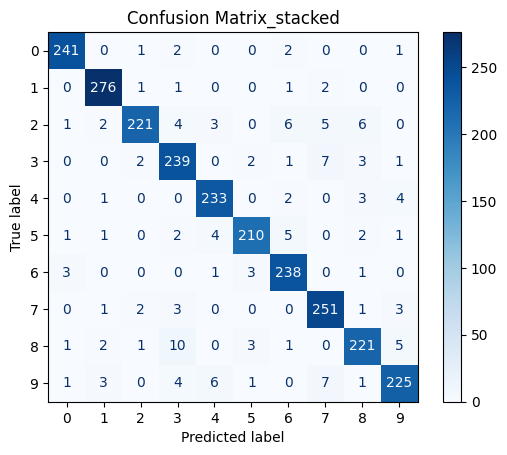

In [186]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # You can also try 'Greens', 'Purples', etc.
plt.title("Confusion Matrix_stacked")
plt.show()